In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

years = range(2011, 2017)
files = ['/Users/ash/Downloads/yosemite-temperatures/yosemite_village/CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' 
         % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)
# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = (data[:, 2] > -1000) & (data[:, 0] == 20160125)
print(data.shape)

(631296, 3)


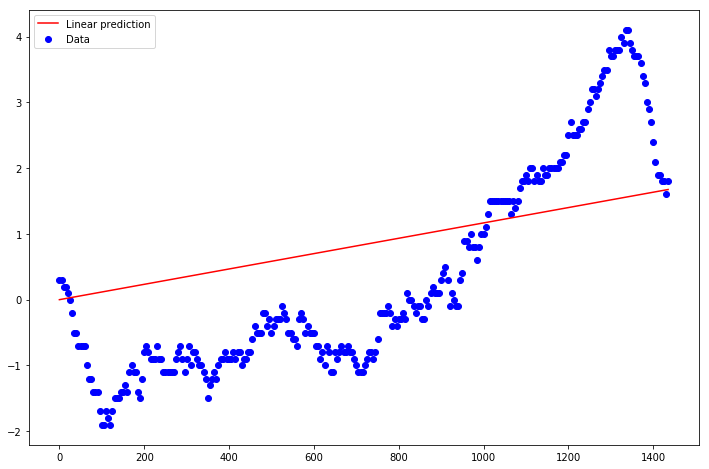

In [2]:
x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
# regr = linear_model.LinearRegression()
# regr = linear_model.Ridge(alpha=0.1, fit_intercept=False)
regr = linear_model.Lasso(alpha=0.0001, fit_intercept=False)
regr.fit(x_train, y_train)


x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.figure(figsize=(12,8))
plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')

plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [3]:
n_rbf = 250
rbf_centers = np.linspace(0,1435,n_rbf).reshape(-1,1)

from sklearn.metrics.pairwise import rbf_kernel

sigma = 1

rbf_X_train = rbf_kernel(x_train, rbf_centers, gamma=1 / sigma)
# regr_rbf = linear_model.LinearRegression()
# regr_rbf = linear_model.Ridge(alpha=0.1, fit_intercept=False)
regr_rbf = linear_model.Lasso(alpha=0.01, fit_intercept=False)

regr_rbf.fit(rbf_X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

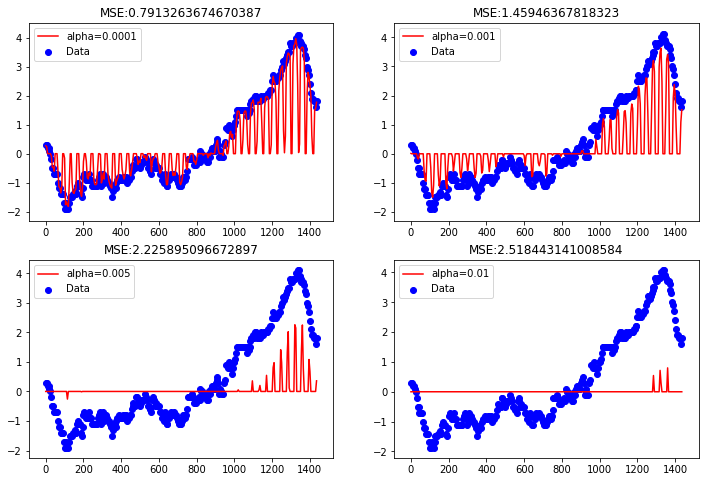

In [20]:
# valid_plot = (data[:, 0] == 20160125)

y_true = y_train
x_true = x_train
plt.figure(figsize=(12,8))
plot_y_1 = regr.predict(x_true)
count=1
for _ in [0.0001,0.001,0.005, 0.01]:
    regr_rbf = linear_model.Lasso(alpha=_, fit_intercept=False)
    regr_rbf.fit(rbf_X_train, y_train)
    rbf_X = rbf_kernel(x_true, rbf_centers)
    plot_y_2 = regr_rbf.predict(rbf_X)
    plt.subplot(2,2,count)
    plt.plot(x_true, plot_y_2,color='red', label='alpha={}'.format(_))
    plt.scatter(x_true, y_true, label='Data', color='blue')
    plt.title('MSE:{}'.format(mean_squared_error(y_true, plot_y_2)))
    plt.legend()
    count+=1
    
plt.show()

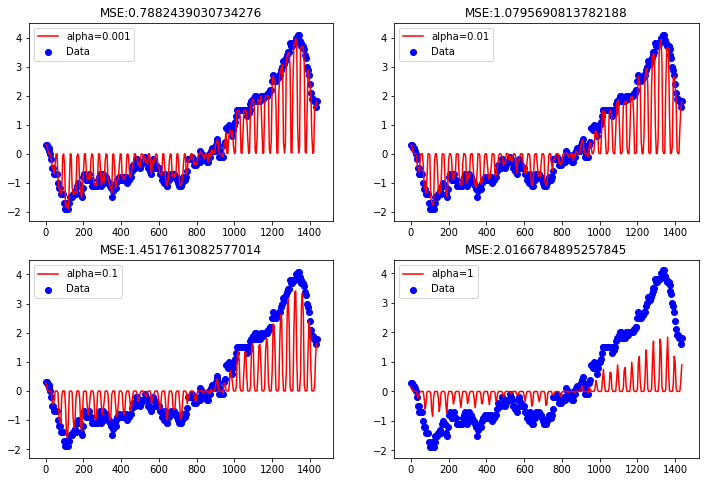

In [24]:
# valid_plot = (data[:, 0] == 20160125)

y_true = y_train
x_true = x_train
plt.figure(figsize=(12,8))
plot_y_1 = regr.predict(x_true)
count=1
for _ in [0.001,0.01,0.1, 1]:
    regr_rbf = linear_model.Ridge(alpha=_, fit_intercept=False)
    regr_rbf.fit(rbf_X_train, y_train)
    rbf_X = rbf_kernel(x_true, rbf_centers)
    plot_y_2 = regr_rbf.predict(rbf_X)
    plt.subplot(2,2,count)
    plt.plot(x_true, plot_y_2,color='red', label='alpha={}'.format(_))
    plt.scatter(x_true, y_true, label='Data', color='blue')
    plt.title('MSE:{}'.format(mean_squared_error(y_true, plot_y_2)))
    plt.legend()
    count+=1
    
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


print('MSE on linear regression:', mean_squared_error(y_true, plot_y_1))
print('MSE on RBF linear regression:', mean_squared_error(y_true, plot_y_2))
print('MAE on linear regression:', mean_absolute_error(y_true, plot_y_1))
print('MAE on RBF linear regression:', mean_absolute_error(y_true, plot_y_2))


MSE on linear regression: 1.6364564354683708
MSE on RBF linear regression: 0.7913263674670387
MAE on linear regression: 1.1520281156554562
MAE on RBF linear regression: 0.5046801200944572


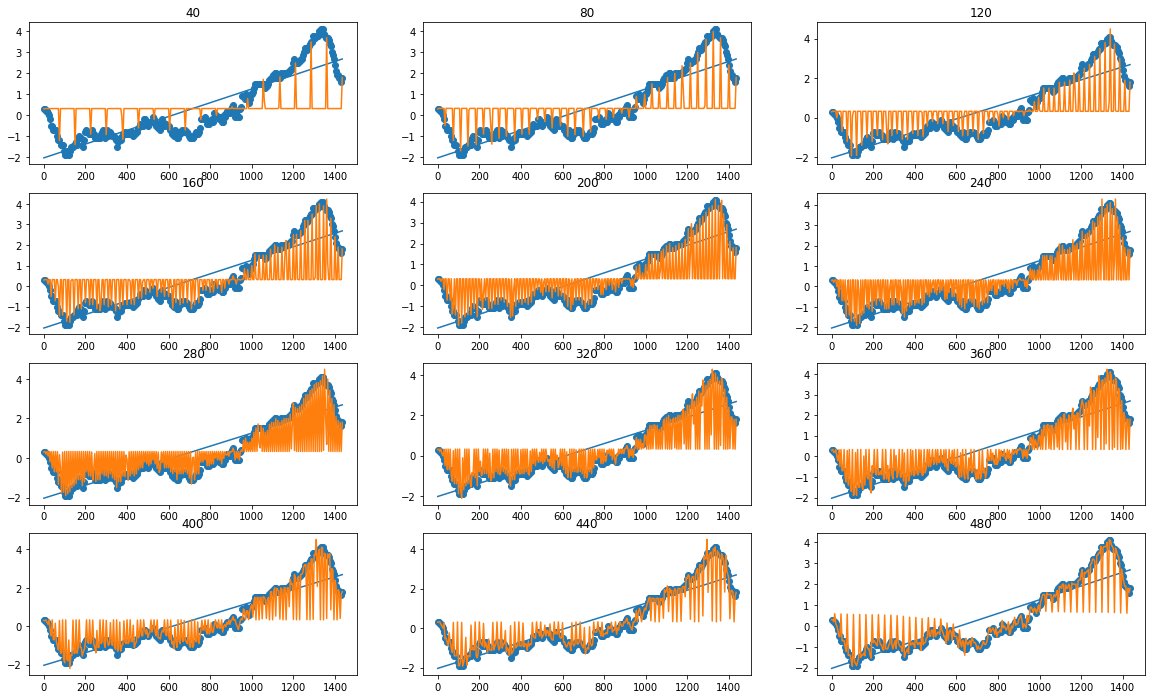

In [9]:
plt.figure(figsize=(20,12))
for _ in [2,4,6,8,10,12,14,16,18,20,22,24,]:
    n_rbf = _*10
    rbf_centers = np.linspace(0,1435,n_rbf).reshape(-1,1)
    sigma = 1
    rbf_X_train = rbf_kernel(x_train, rbf_centers, gamma=1 / sigma)
    regr_rbf = linear_model.LinearRegression()
    regr_rbf.fit(rbf_X_train, y_train)
    rbf_X = rbf_kernel(x_true, rbf_centers)
    plot_y_2 = regr_rbf.predict(rbf_X)
    plt.subplot(4,3,_/2)
    plt.scatter(x_true, y_true)
    plt.plot(x_true, plot_y_1)
    plt.plot(x_true, plot_y_2)
    plt.title(_*20)
plt.show()